# CEB Project: Applying for data science roles


About the Dataset:
https://www.kaggle.com/datasets/sachinkumar62/datascience-job-data

This dataset contains information on job candidates applying for data science roles. It includes demographic details, education background, work experience, and training hours. The target variable indicates whether a candidate is looking for a new job (1) or not (0).

Key Columns

enrollee_id: Unique identifier for each candidate.

city: City where the candidate is located.

city_development_index: Development index score of the city (0-1 scale).

gender: Candidate's gender (Male, Female, Other).

relevent_experience: Whether the candidate has relevant experience.

enrolled_university: Candidate’s enrollment status (full-time, part-time, or not enrolled).

education_level: Highest level of education.

major_discipline: Field of study (STEM, Business, etc.).

experience: Years of professional experience.

company_size: Size of the last company worked at.

company_type: Type of company (e.g., Pvt Ltd, Startup, etc.).

training_hours: Hours spent in training.

target: Binary indicator (1 = looking for a new job, 0 = not looking).


First, I uploaded the file to my GitHub repository to make it more accessible for this project. Afterward, I loaded it into memory.

Now I can take a look at the data, and some propertys of the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random

link = "https://raw.githubusercontent.com/FuxBee/CEBProject/main/data_science_job.csv"
df = pd.read_csv(link)
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


Gather some information about the data and ensure that any missing data is filled with an 'Unknown' string.

In [16]:
df.info()
df.fillna("Unknown")
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
count,19158.000000,19158,18679.000000,14650,19158,18772,18698,16345,19093.000000,13220,13018,18392.000000,19158.000000
unique,NaN,123,NaN,3,2,3,5,6,NaN,8,6,NaN,NaN
top,NaN,city_103,NaN,Male,Has relevent experience,no_enrollment,Graduate,STEM,NaN,50-99,Pvt Ltd,NaN,NaN
freq,NaN,4355,NaN,13221,13792,13817,11598,14492,NaN,3083,9817,NaN,NaN
mean,16875.358179,NaN,0.828951,NaN,NaN,NaN,NaN,NaN,9.928036,NaN,NaN,65.185787,0.249348
std,9616.292592,NaN,0.123334,NaN,NaN,NaN,NaN,NaN,6.505268,NaN,NaN,59.885626,0.432647
min,1.000000,NaN,0.448000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000,0.000000
25%,8554.250000,NaN,0.740000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,23.000000,0.000000
50%,16982.500000,NaN,0.903000,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,47.000000,0.000000
75%,25169.750000,NaN,0.920000,NaN,NaN,NaN,NaN,NaN,16.000000,NaN,NaN,88.000000,0.000000


For start I check out the values of the comlumn company_size:

In [3]:
df['company_size'].unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

Separate the company_size column to get min and max values for the company values in the dataframe:

By searching for a not digit character in the string and using that character I split it. Then use the first as the minimum and the last as the maximum values.

In [4]:
def get_company_size_range(size):
  if pd.isnull(size):
    return(None,None)
  else:
    mark=None
    for char in size:
      if not char.isdigit():
        mark=char
        break

    index=size.find(mark)

    min_size = (size.split(mark)[0]) if index>0 else '0'
    max_size=(size.split(mark)[1]) if index<len(size)-1 else ('inf')

    return(min_size,max_size)

dfSizes=pd.DataFrame(df['company_size'].apply(lambda x: pd.Series(get_company_size_range(x))))
dfSizes.columns=['min_company_size','max_company_size']
dfSizes.head()

,min_company_size,max_company_size
0,None,None
1,50,99
2,None,None
3,None,None
4,50,99


Check the converted values are valid:

In [5]:
print(dfSizes['max_company_size'].unique())
print(dfSizes['min_company_size'].unique())

[None '99' '10' 'inf' '9999' '4999' '49' '500' '999']
[None '50' '0' '10000' '5000' '1000' '10' '100' '500']


Get random samples from the 2 dataframe and merge it to check the transformation is correct:

In [6]:
dfSizes.merge(df.loc[:,'company_size'],left_index=True,right_index=True).sample(10)


,min_company_size,max_company_size,company_size
1708,None,None,NaN
4256,None,None,NaN
5238,50,99,50-99
5378,100,500,100-500
10058,10000,inf,10000+
11875,None,None,NaN
2327,100,500,100-500
17820,1000,4999,1000-4999
13427,0,10,<10
16403,10000,inf,10000+


Created a hierarchical column index for company sizes:

In [7]:
columns = pd.MultiIndex.from_tuples([
    ('company_size', 'min'),
    ('company_size', 'max')
])
dfSizes.columns=columns
dfSizes.head()

company_size      
           min   max
0         None  None
1           50    99
2         None  None
3         None  None
4           50    99

Made the original dataset with the new companysize data instead of the original column:

In [8]:
new_df = df.drop(columns=['company_size'])
new_df = pd.concat([dfSizes,new_df], axis=1)
new_df = new_df.set_index( ['education_level'] )

new_df.head()

,"(company_size, min)","(company_size, max)",enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,major_discipline,experience,company_type,training_hours,target
education_level,,,,,,,,,,,,,
Graduate,None,None,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,STEM,20.0,NaN,36.0,1.0
Graduate,50,99,29725,city_40,0.776,Male,No relevent experience,no_enrollment,STEM,15.0,Pvt Ltd,47.0,0.0
Graduate,None,None,11561,city_21,0.624,NaN,No relevent experience,Full time course,STEM,5.0,NaN,83.0,0.0
Graduate,None,None,33241,city_115,0.789,NaN,No relevent experience,NaN,Business Degree,0.0,Pvt Ltd,52.0,1.0
Masters,50,99,666,city_162,0.767,Male,Has relevent experience,no_enrollment,STEM,20.0,Funded Startup,8.0,0.0


**What is the most common education level among job candidates?**

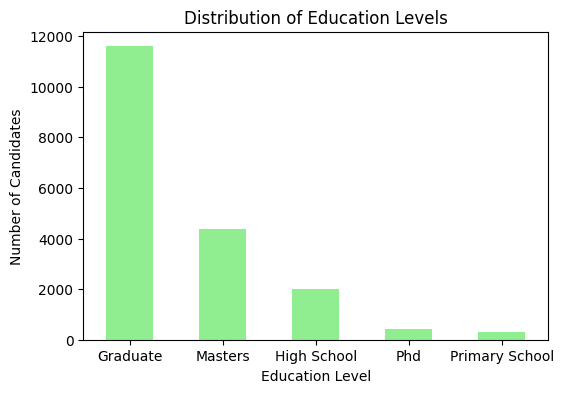

The most common education level is: Graduate


In [9]:
education_counts =new_df.groupby('education_level').count()['enrollee_id'].sort_values(ascending=False)
most_common_education = education_counts.index[0]

plt.figure(figsize=(6, 4))
education_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Number of Candidates')
plt.xticks(rotation=0, ha='center')
plt.show()

print(f"The most common education level is: {most_common_education}")

**Which major discipline is most represented in the dataset?**

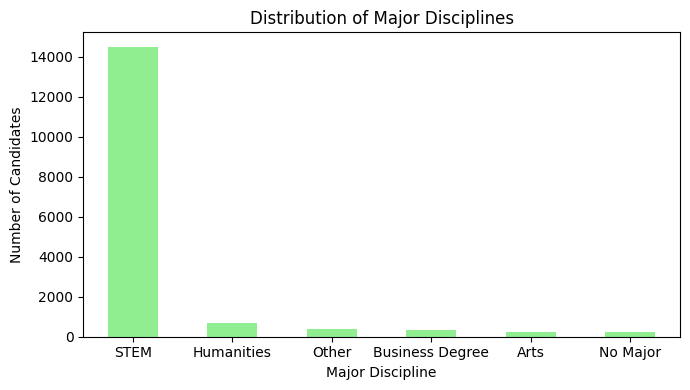

The most represented major discipline is: STEM


In [10]:
major_counts = df['major_discipline'].value_counts()

most_common_major = major_counts.index[0]

plt.figure(figsize=(7, 4))
major_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Major Disciplines')
plt.xlabel('Major Discipline')
plt.ylabel('Number of Candidates')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

print(f"The most represented major discipline is: {most_common_major}")

**How many candidates have relevant experience?**

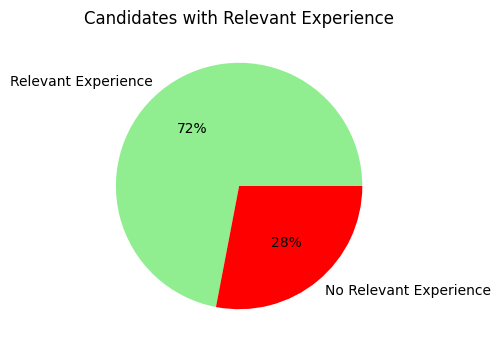

Number of candidates with relevant experience: 13792


In [11]:
num_relevant_experience = len(df[df['relevent_experience'] == 'Has relevent experience'])

plt.figure(figsize=(4, 4))
plt.pie([num_relevant_experience, len(df) - num_relevant_experience], labels=['Relevant Experience', 'No Relevant Experience'], colors=['lightgreen', 'red'], autopct='%.f%%')
plt.title('Candidates with Relevant Experience')
plt.show()

print(f"Number of candidates with relevant experience: {num_relevant_experience}")

**What is the average number of training hours completed by candidates?**

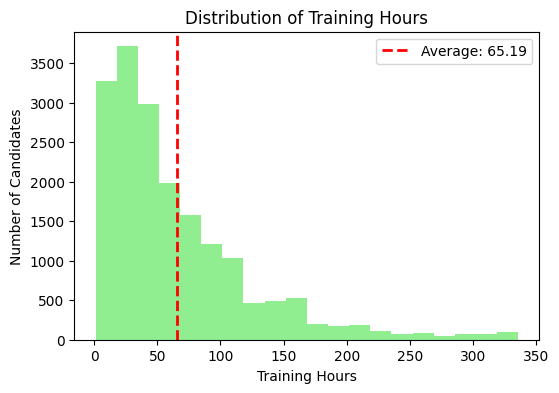

The average number of training hours completed by candidates is: 65.19


In [12]:
average_training_hours = df['training_hours'].mean()

plt.figure(figsize=(6, 4))
plt.hist(df['training_hours'], bins=20, color='lightgreen')
plt.title('Distribution of Training Hours')
plt.xlabel('Training Hours')
plt.ylabel('Number of Candidates')
plt.axvline(average_training_hours, color='red', linestyle='dashed', linewidth=2, label=f'Average: {average_training_hours:.2f}')
plt.legend()
plt.show()

print(f"The average number of training hours completed by candidates is: {average_training_hours:.2f}")

**Which company size has the most job candidates in the dataset?**

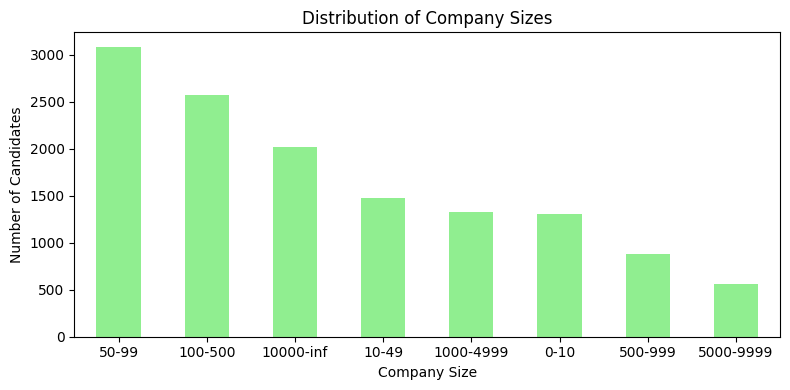

The company size with the most job candidates is: 50-99 (also have 5938 with no data.)


In [13]:
new_df['company_size_range'] = '' + new_df['company_size','min'] + '-' + new_df['company_size','max']
company_size_counts = new_df.loc[new_df['company_size_range']!="nan-nan",'company_size_range'].value_counts()

plt.figure(figsize=(8, 4))
company_size_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Company Sizes')
plt.xlabel('Company Size')
plt.ylabel('Number of Candidates')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

most_common_company_size = company_size_counts.index[0]
missing=len(df['company_size'])-company_size_counts.sum()

print(f"The company size with the most job candidates is: {most_common_company_size} (also have {missing} with no data.)")

In conclusion, this dataset provides valuable insights into the demographics and qualifications of data science job candidates.
These findings can be useful for recruiters and job seekers to understand the current landscape of the data science job market.